In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [36]:
df=pd.read_csv('sta_temperature.csv')
df.head()
df['date']=pd.to_datetime(df['date'],unit='D')
df


,date,station A,station B
0,1970-01-01,19.0,28.0
1,1970-01-02,25.0,28.0
2,1970-01-03,22.0,26.0
3,1970-01-04,-1.0,19.0
4,1970-01-05,4.0,16.0
5,1970-01-06,14.0,24.0
6,1970-01-07,21.0,26.0
7,1970-01-08,22.0,24.0
8,1970-01-09,23.0,24.0
9,1970-01-10,27.0,29.0


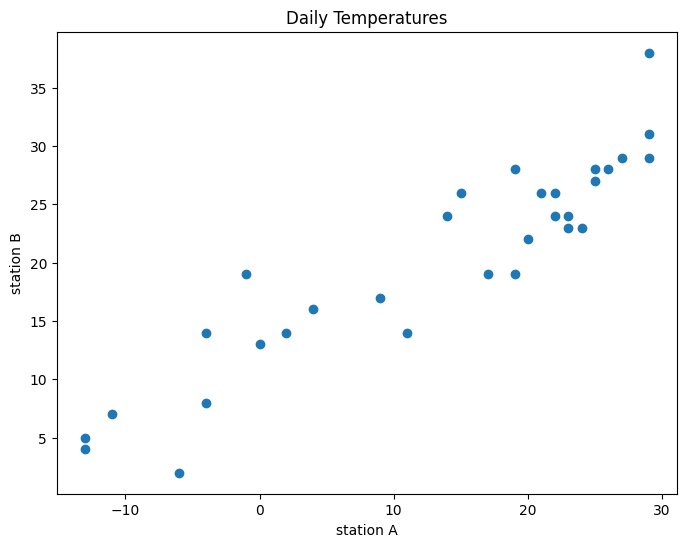

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(df['station A'],df['station B'])
plt.xlabel('station A')
plt.ylabel('station B')
plt.title('Daily Temperatures')
plt.show()



In [38]:
from sklearn.linear_model import LinearRegression
X=df[['station A']]
Y=df['station B']
model=LinearRegression()
model.fit(X,Y)
model_pred_Y=model.predict(X)
#Slope=model.coef_[0]
#intercept=model.intercept_
#R_equationLine=Slope*X+intercept


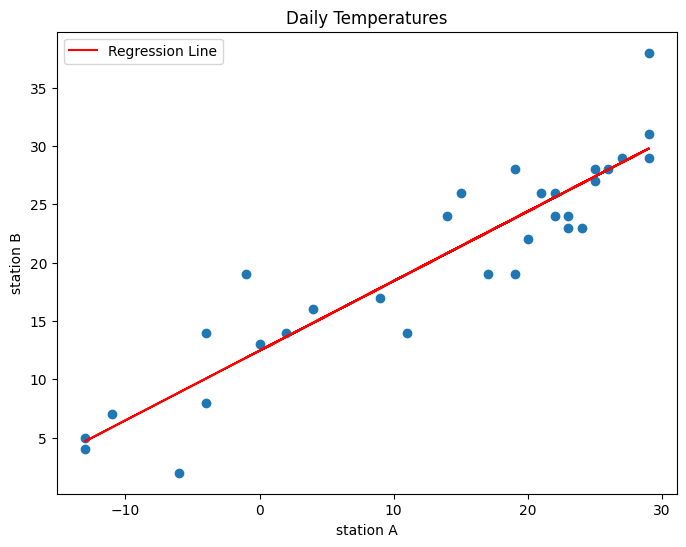

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(df['station A'],df['station B'])
plt.plot(X,model_pred_Y,color='red',label='Regression Line')
plt.xlabel('station A')
plt.ylabel('station B')
plt.title('Daily Temperatures')
plt.legend()
plt.show()

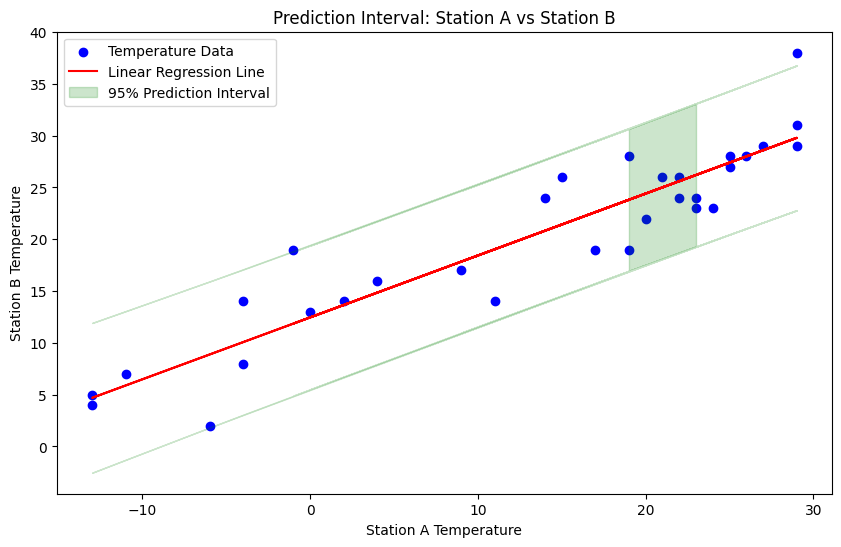

In [68]:
from sklearn.linear_model import LinearRegression
from scipy import stats
n = len(X)
se_pred = np.sqrt(np.sum((Y -model_pred_Y )**2) / (n-2)) * np.sqrt(1 + 1/n + (X - np.mean(X))**2 / np.sum((X - np.mean(X))**2))
prediction_intervals = 1.96 * se_pred # 95% CI
df['model_pred_Y']=model_pred_Y
df['prediction_intervals']=prediction_intervals
plus=df['model_pred_Y']+df['prediction_intervals']
#print(plus)
minus=df['model_pred_Y']-df['prediction_intervals']

plt.figure(figsize=(10, 6))
plt.scatter(df['station A'], df['station B'], color='blue', label='Temperature Data')
plt.plot(df['station A'],model_pred_Y, color='red', label='Linear Regression Line')
plt.fill_between(df['station A'], minus, plus, color='green', alpha=0.2, label='95% Prediction Interval')
plt.xlabel('Station A Temperature')
plt.ylabel('Station B Temperature')
plt.title('Prediction Interval: Station A vs Station B')
plt.legend()
plt.show()

c:\fall\jenv\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


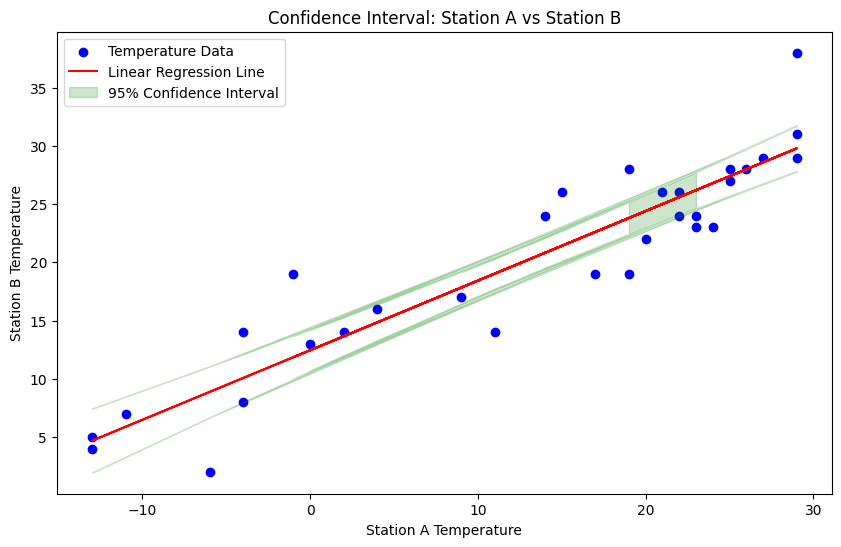

In [72]:
t_val = stats.t.ppf(1-0.025, n-2)
se_conf = np.sqrt(np.sum((Y - model_pred_Y)**2) / (n-2)) * np.sqrt(1/n + (X - np.mean(X))**2 / np.sum((X - np.mean(X))**2))
confidence_intervals = t_val * se_conf
df['confidence_intervals']=confidence_intervals
plus1=df['model_pred_Y']+df['confidence_intervals']
#print(plus)
minus1=df['model_pred_Y']-df['confidence_intervals']
plt.figure(figsize=(10, 6))
plt.scatter(df['station A'], df['station B'], color='blue', label='Temperature Data')
plt.plot(df['station A'],model_pred_Y, color='red', label='Linear Regression Line')
plt.fill_between(df['station A'],minus1 ,plus1 , color='green', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Station A Temperature')
plt.ylabel('Station B Temperature')
plt.title('Confidence Interval: Station A vs Station B')
plt.legend()
plt.show()